<a href="https://colab.research.google.com/github/lukeolson/imperial-multigrid/blob/master/lecture-1-mg-basics/2-relaxation-Jacobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
%matplotlib inline

Create a small 8x8 matrix
$$
A = 
\left[
\begin{array}{r r r r r}
2 & -1 &  & & \\
-1 & 2 & -1 & & \\
   & -1 & 2 & -1 & \\
& & \ddots & & \\
& & & -1 & 2
\end{array}
\right]
$$

In [2]:
n = 8
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')
b = np.zeros((n,))

I = sparse.eye(n, format='csr')
Dinv = 0.5 * I
D = 2 * I
E = -sparse.tril(A, -1)

Let's take a very smooth mode.

In fact one, the smoothest for this problem: the first Fourier mode.

Text(0.5, 0, '$x$')

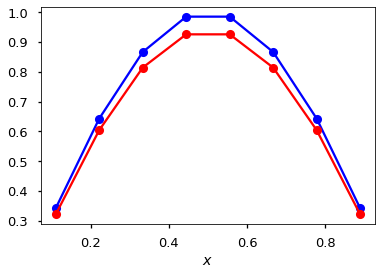

In [3]:
x = np.linspace(0,1,n+2)[1:-1]
eold = np.sin(np.pi * x)
enew = (I - Dinv * A) * eold
plt.plot(x, eold, 'bo-')
plt.plot(x, enew, 'ro-')
plt.xlabel(r'$x$')

Now let's perturb one of the values, by say 20%.

This will add some high frequency to this error.

Text(0.5, 0, '$x$')

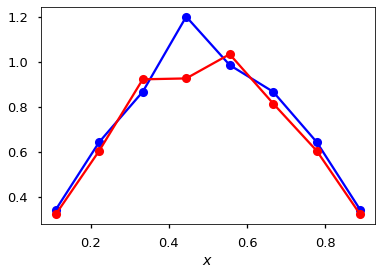

In [4]:
x = np.linspace(0,1,n+2)[1:-1]
eold = np.sin(np.pi * x)
eold[3] = 1.2
enew = (I - Dinv * A) * eold
plt.plot(x, eold, 'bo-')
plt.plot(x, enew, 'ro-')
plt.xlabel(r'$x$')

As a test, try the highest mode on this grid, something that oscillates as frequenty as possible.

Text(0.5, 0, '$x$')

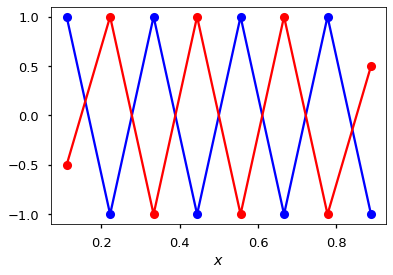

In [5]:
x = np.linspace(0,1,n+2)[1:-1]
eold = np.ones(n)
eold[1::2] = -1
enew = (I - Dinv * A) * eold
plt.plot(x, eold, 'bo-')
plt.plot(x, enew, 'ro-')
plt.xlabel(r'$x$')

Lets return to a 64x64 problem

In [6]:
n = 64
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')
b = np.zeros((n,))
x = np.linspace(0,1,n+2)[1:-1]
I = sparse.eye(n, format='csr')
Dinv = 0.5 * I
D = 2 * I
E = -sparse.tril(A, -1)

We will take a random *error* in this case and
run the problem
$$
A u = 0
$$

What happense if we change 2/3 to 1 and plot the error?

In [7]:
rnorm = []

test = 'random'

if test == 'random':
    np.random.seed(233008)
    u = np.random.rand(n)
elif test == 'smooth':
    n = A.shape[0]
    u = np.sin(np.pi * np.arange(1, n+1)/ (n+1))
    
uinit = u.copy()

for i in range(10):
    u[:] = u - 2/3 * Dinv * A * u
    #u[:] = u - sla.(D-E, A*u)
    rnorm.append(np.linalg.norm(A * u))

Text(0.5, 0, '$x$')

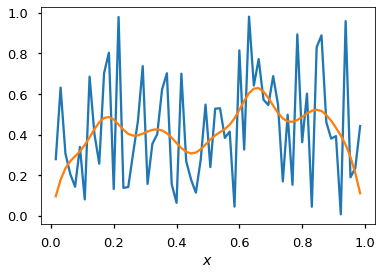

In [8]:
plt.plot(x, uinit, '-')
plt.plot(x, u, '-')
plt.xlabel(r'$x$')

In this example we will consider 4 specific modes: 1, 3, 6, and 48,

In [9]:
u1 = np.sin(np.arange(1,n+1) * 1 * np.pi / (n+1))
u3 = np.sin(np.arange(1,n+1) * 3 * np.pi / (n+1))
u6 = np.sin(np.arange(1,n+1) * 6 * np.pi / (n+1))
u48 = np.sin(np.arange(1,n+1) * 48 * np.pi / (n+1))


omega = 2.0 / 3.0

rnorm1 = []
rnorm3 = []
rnorm6 = []
rnorm48 = []

for i in range(100):
    u = u1
    u[:] = u - omega * Dinv * A * u
    rnorm1.append(np.linalg.norm(A * u))
    
    u = u3
    u[:] = u - omega * Dinv * A * u
    rnorm3.append(np.linalg.norm(A * u))
    
    u = u6
    u[:] = u - omega * Dinv * A * u
    rnorm6.append(np.linalg.norm(A * u))
    
    u = u48
    u[:] = u - omega * Dinv * A * u
    rnorm48.append(np.linalg.norm(A * u))    

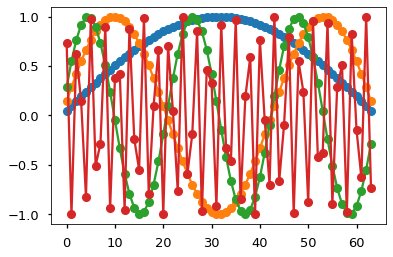

In [10]:
u1 = np.sin(np.arange(1,n+1) * 1 * np.pi / (n+1))
u3 = np.sin(np.arange(1,n+1) * 3 * np.pi / (n+1))
u6 = np.sin(np.arange(1,n+1) * 6 * np.pi / (n+1))
u48 = np.sin(np.arange(1,n+1) * 48 * np.pi / (n+1))
plt.plot(u1, '-o', label='k=1')
plt.plot(u3,  '-o', label='k=2')
plt.plot(u6, '-o', label='k=3')
plt.plot(u48, '-o', label='k=48')

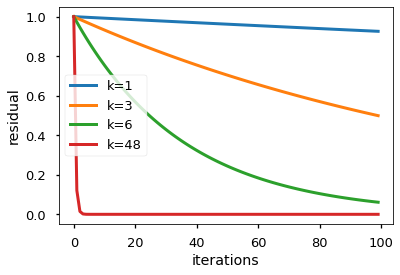

In [11]:
for rnorm, label in zip([rnorm1, rnorm3, rnorm6, rnorm48],
                        ['k=1', 'k=3', 'k=6', 'k=48']):
    rnorm = np.array(rnorm) / rnorm[0]
    plt.plot(rnorm, lw=3, label=label)
plt.xlabel('iterations')
plt.ylabel('residual')
plt.legend()

We can also consider an initial error made up of three modes (in this case 1, 6, and 32.  What happens to the error?

In [12]:
omega = 2.0 / 3.0

rnorm = []
enorm = []
u1 = np.sin(1 * np.pi * np.arange(1, n+1)/ (n+1))
u6 = np.sin(6 * np.pi * np.arange(1, n+1)/ (n+1))
u32 = np.sin(32 * np.pi * np.arange(1, n+1)/ (n+1))
u = ((u1 + u6 + u32) / 3.0).copy()
rnorm.append(np.linalg.norm(A * u))
enorm.append(np.linalg.norm(u, ord=np.inf))

for i in range(100):
    u[:] = u - omega * Dinv * A * u
    rnorm.append(np.linalg.norm(A * u))
    enorm.append(np.linalg.norm(u, ord=np.inf))  # why?

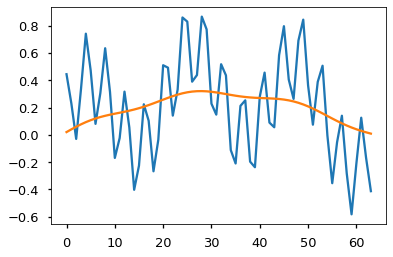

In [13]:
plt.plot((u1 + u6 + u32) / 3.0)
plt.plot(u)

(0.0, 100.0, 0.0, 1.0)

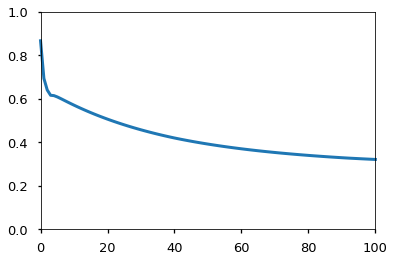

In [14]:
norm = enorm
#norm = np.array(norm) / norm[0]
plt.plot(norm, lw=3, clip_on=False)
plt.axis([0,100, 0, 1])

Let's observe the spectrum of
$$
G = I - (2/3) D^{-1} A
$$

Text(0.5, 0, 'wave number, $k$')

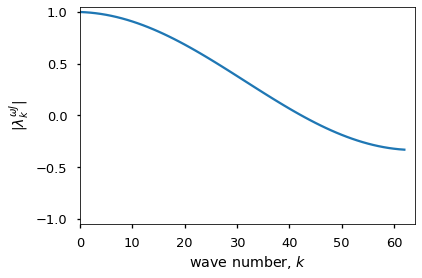

In [15]:
K = np.arange(1,n)
absG = 1 - (2/3) * (1/2) * 4 * np.sin(K * np.pi / (2*(n+1)))**2

plt.plot(absG,'-')
plt.axis([0,n, -1.05,1.05])

plt.ylabel(r'$|\lambda^{\omega J}_k|$')
plt.xlabel(r'wave number, $k$')

Let's observe the spectrum of
$$
G = I - \omega D^{-1} A
$$
for several $\omega$

Text(0.5, 0, 'wave number, $k$')

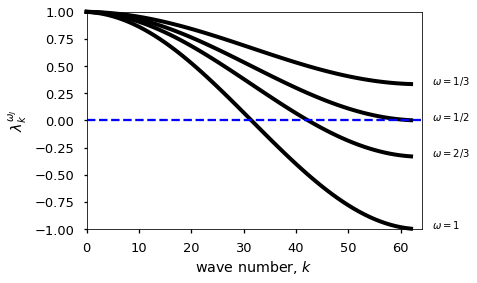

In [16]:
K = np.arange(1,n)

omega = 1.0 /2
lmbda = 1 - (omega / 2) * 4.0 * np.sin(np.pi * K / (2*(n+1)))**2
plt.plot(lmbda,'-k',label='residual',linewidth=4, clip_on=False)
plt.text(n+2, lmbda[-1], r'$\omega=1/2$')

omega = 1.0 / 3.0
lmbda = 1 - (omega / 2) * 4.0 * np.sin(np.pi * K / (2*(n+1)))**2
plt.plot(lmbda,'-k',label='residual',linewidth=4, clip_on=False)
plt.text(n+2, lmbda[-1], r'$\omega=1/3$')

omega = 2.0 / 3.0
lmbda = 1 - (omega / 2) * 4.0 * np.sin(np.pi * K / (2*(n+1)))**2
plt.plot(lmbda,'-k',label='residual',linewidth=4, clip_on=False)
plt.text(n+2, lmbda[-1], r'$\omega=2/3$')

omega = 1
lmbda = 1 - (omega / 2) * 4.0 * np.sin(np.pi * K/ (2*(n+1)))**2
plt.plot(lmbda,'-k',label='residual',linewidth=4, clip_on=False)
plt.text(n+2, lmbda[-1], r'$\omega=1$')

plt.plot([0, n], [0, 0], '--b')
plt.axis([0,n,-1,1])
plt.ylabel(r'$\lambda^{\omega_J}_k$')
plt.xlabel(r'wave number, $k$')